# D213 Advanced Data Analysis Performance Assessment, Task # 2 Sentiment Analysis Using Neural Networks

##### Submitted by Kimberly Hubacek Student ID: 001249836

## A1. Research Question

####Can viewer sentiment of movies be predicted with an accuracy of 70% or greater using a recurrent neural network model trained on the University of California Irvine’s IMDB reviewer sentiment dataset?

## A2. Goal of Analysis 

####Telco Communications has a streaming movie add on available for their customers to purchase. The budget to purchase movie rights is currently set at $2 million per year.  Telco Communications seeks to discover what movies audiences had positive sentiments towards to decide which movie rights they should purchase for next quarter.

The goal of the analysis is to create a recurrent neural network that will determine the audience sentiment for movies at an accuracy of 70% or greater using the IMDB database to train and test the model. IMDB is a website that allows viewers to rate movies on a scale of one star through ten stars, one star being the lowest score indicating the viewer had a very negative sentiment about the movie and ten stars being the highest score indicating the viewer had a very positive sentiment about the movie.

Being able to successfully predict audience sentiment about this movie could provide a stepping stone to other projects for Telco Communications, such as creating a recommendation engine to recommend films to Telco customers to consider watching films they are likely to enjoy based on what movies they rated positively in the past. 



## A3.Neural Network Identification

####A neural network is a series of algorithms that “learns” and makes decisions by recognizing underlying relationships in data in a similar way to a human brain. While the neurons in a human brain are made of biological components, the “neurons” in a neural network are made of mathematical models. Like the human brain contains different section with neurons firing between them, neural networks are made of separate layers, or nodes that work together to solve complex problems. Neural networks “learn” on training data and execute decisions on validation or test data (Yasar, 2023).

This analysis will utilize a recurrent neural network (RNN) to train and test the IMDB data. A recurrent neural network is a neural network that is typically used for natural language processing and text data because it maintains recurrent connection with itself. This allows the recurrent neural network to quickly loop through sequential information. This is valuable for text analysis since words in a sentence rely on previous words for context. For example, the word “one” will likely appear in the IMDB data. It might appear as an audience member listing attributes about the movie, “One thing I’d like to mention…” or it could be used as an appraisal, “This is the number one movie I’ve seen all year!” The other words in the sentence are needed to determine the context of the word “one” in the sentence.  Context is vital to language processing and discerning the meaning of words in a phrase. 


In [1]:
#ignoring warnings for readability
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading libraries and Packages

import pandas as pd # Dataframe and data manipulations
import numpy as np # array objects for calculations
import matplotlib.pyplot as plt # visualizations
 #magic word settings
%matplotlib inline

import seaborn as sns #visualizations
from wordcloud import WordCloud #visualizations

# scikit-learn for predictive analysis
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import re # for regular expression usage
import keras
from keras.callbacks import EarlyStopping
import os

#tensor flow packages
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer #convert input text to tokens
from tensorflow.keras.preprocessing.sequence import pad_sequences # for padding of text
from tensorflow.keras.callbacks import EarlyStopping # Stop training at a threshold
from tensorflow.keras.layers import Dense, Embedding, Flatten
from tensorflow.keras.models import Sequential

import nltk #natural language toolkit
import string
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
pd.set_option("display.max_columns", None)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\khuba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\khuba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# checking Python version
from platform import python_version
#print Python version
("Python version used for this analysis is: ", python_version())

('Python version used for this analysis is: ', '3.8.8')

In [4]:
# checking TensorFlow version

tf.__version__

'2.13.0'

In [5]:
# read in imdb data
imdb = pd.read_csv('imdb.txt', sep='  	', engine='python', header=None)
imdb.columns = ['Review', 'Sentiment']
imdb.head(5)

,Review,Sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [6]:
# shape of imdb data

imdb.shape

(1000, 2)

In [7]:
#detecting nulls
imdb.isnull().sum()

Review       0
Sentiment    0
dtype: int64

In [8]:
# detecting duplicates
imdb.duplicated().sum()

3

In [9]:
# dropping duplicate rows

imdb = imdb.drop_duplicates()
imdb.shape

(997, 2)

In [10]:
# print imdb stopwords and common punctuation
stop_words = (nltk.corpus.stopwords.words('english')) + list(string.punctuation)
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [11]:
# retrieving sum of stop words and punctuation elements
len(stop_words)
print(f"List of stopwords generated contain {len(stop_words)} elements.")

List of stopwords generated contain 211 elements.


In [12]:
# creating list of 7 movie related stopwords
movie_stopwords = ['movie', 'movies', 'flick', 'film', 'films', 'picture', 'cinema']

In [13]:
# add movie related stopwords
for word in movie_stopwords:
    if word not in stop_words:
        stop_words.append(word)
    else:
        pass

In [14]:
# printing updated stop words
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [15]:
# retrieving updated sum of stop words and punctuation elements
# total should be 218 (211 + 7 moview related stopwords)
len(stop_words)
print(f"List of stopwords generated contain {len(stop_words)} elements.")

List of stopwords generated contain 218 elements.


In [16]:
# Creating tokenizer for out of vocaublary words. This will replace words that aren't in dictionary with "OOV"
tokenizer = Tokenizer(oov_token="<OOV>") 

## B1. Data Exploration and Explanation of Model Elements

####The raw IMDB dataset contains audience member reviews with full punctuation and capitalization along with a column containing the audience’s sentiment of the movie. The sentiment is binary, with a 0 zero representing a negative sentiment and a 1 representing a positive sentiment. The IMDB dataset is provided by the University of California Irvine’s Machine Learning Repository and features movie reviews from 2015. 

After reading in the IMDB data, the first step was to explore the data. The dataframe contained 1,000 rows, or individual reviews. The reviews are entirely in English, with no emojis or non-English characters. The reviews contained full punctuation and a mix of uppercase and lowercase letters. There could be punctuation emojis such as “: - )” hidden in the reviews. All punctuation and any potential hidden punctuation emojis were removed during data preparation. 

The vocabulary size of the IMDB data was modified during data preparation. Stopwords, or words commonly used that do not provide context, were removed from the dataset, along with movie-related words that could cause the neural network to accidentally attribute sentiment to words describing a movie, such as "film" or "flick". Also, non-English words were replaced with word tokens. After data preparation, a tfid vector was used to calculate the total number of features, or words remaining in the dataset. The final vocabulary size used in the model was 2875 words.

The proposed word embedding length for the RNN model was calculated after tokenizing and vectorizing the data using the GLoVe method. The embedding length was calculated by subtracting the standard deviation of the word count of the reviews (5.2) from maximum sequence length (43) and rounding the results. The proposed word embedding length for the model is 38. 

The maximum sequence length was determined by searching for the review in the dataset with the highest word count after stopwords were removed and the data was tokenized. The maximum sequenced length is 43 words. All sequences need to be the same length to perform sentiment analysis. The rest of the reviews will be padded to have 43 words. 

In [17]:
# stepwise tokenization

# coverting text to lower case
imdb['reduced'] = imdb['Review'].str.lower()

In [18]:
# clean/remove numbers
imdb['reduced'] = imdb['reduced'].str.replace('\d+', ' ')

In [19]:
# clean/remove special characters. 
# most of these would have been accounted for when detecting punctuation in stopwords creation.
# still including for thoroughness and to demonstrate alternative method for removing punctuation for future use
imdb['reduced'] = imdb['reduced'].str.replace('[^\w\s\@\#]',' ')

In [20]:
# Removing Stopwords from data

# remove stopwords from reduced column
imdb['reduced'] = imdb['reduced'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
# remove stopwords from tokenized data
imdb['tokenized'] = imdb['reduced'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [21]:
# reorder columns so viewer sentiment is last
imdb = imdb[['Review', 'reduced', 'tokenized', 'Sentiment']]

In [22]:
# splitting reviews into tokenized word listings
imdb['tokenized'] = imdb['tokenized'].apply(lambda x: x.split())

In [23]:
# retrieving word count for each review
imdb['word_count'] = imdb['tokenized'].apply(lambda x: len(x))

In [24]:
# reorder columns so sentiment is last
imdb = imdb[['Review', 'reduced', 'tokenized','word_count', 'Sentiment']]

In [25]:
# checking first 5 rows
imdb.head(5)

,Review,reduced,tokenized,word_count,Sentiment
0,"A very, very, very slow-moving, aimless movie ...",slow moving aimless distressed drifting young man,"[slow, moving, aimless, distressed, drifting, ...",7,0
1,Not sure who was more lost - the flat characte...,sure lost flat characters audience nearly half...,"[sure, lost, flat, characters, audience, nearl...",8,0
2,Attempting artiness with black & white and cle...,attempting artiness black white clever camera ...,"[attempting, artiness, black, white, clever, c...",18,0
3,Very little music or anything to speak of.,little music anything speak,"[little, music, anything, speak]",4,0
4,The best scene in the movie was when Gerardo i...,best scene gerardo trying find song keeps runn...,"[best, scene, gerardo, trying, find, song, kee...",9,1


In [26]:
#checking last 5 rows
imdb.tail(5)

,Review,reduced,tokenized,word_count,Sentiment
995,I just got bored watching Jessice Lange take h...,got bored watching jessice lange take clothes,"[got, bored, watching, jessice, lange, take, c...",7,0
996,"Unfortunately, any virtue in this film's produ...",unfortunately virtue production work lost regr...,"[unfortunately, virtue, production, work, lost...",7,0
997,"In a word, it is embarrassing.",word embarrassing,"[word, embarrassing]",2,0
998,Exceptionally bad!,exceptionally bad,"[exceptionally, bad]",2,0
999,All in all its an insult to one's intelligence...,insult one intelligence huge waste money,"[insult, one, intelligence, huge, waste, money]",6,0


In [27]:
# retrieving the total number of unique words
unique_words = set()
for review in imdb['tokenized']:
    for word in review:
        unique_words.add(word)  

In [28]:
# print number of unique words
len(unique_words)

2887

In [29]:
# run tfidf vectorizer on tokenized reviews
tfidfvector = TfidfVectorizer()
X_tfid = tfidfvector.fit_transform(imdb['tokenized'].apply(lambda x: ' '.join(x)))

In [30]:
X_tfid.shape

(997, 2875)

In [31]:
print(len(tfidfvector.get_feature_names_out()))

2875


In [32]:
# convert tfidf to dataframe
X_tfid_df = pd.DataFrame(X_tfid.toarray(), columns=tfidfvector.get_feature_names_out())
X_tfid_df.head()

aailiyah  abandoned  ability  abroad  absolutely  abstruse  abysmal  \
0       0.0        0.0      0.0     0.0         0.0       0.0      0.0   
1       0.0        0.0      0.0     0.0         0.0       0.0      0.0   
2       0.0        0.0      0.0     0.0         0.0       0.0      0.0   
3       0.0        0.0      0.0     0.0         0.0       0.0      0.0   
4       0.0        0.0      0.0     0.0         0.0       0.0      0.0   

   academy  accents  accessible  acclaimed  accolades  accurate  accurately  \
0      0.0      0.0         0.0        0.0        0.0       0.0         0.0   
1      0.0      0.0         0.0        0.0        0.0       0.0         0.0   
2      0.0      0.0         0.0        0.0        0.0       0.0         0.0   
3      0.0      0.0         0.0        0.0        0.0       0.0         0.0   
4      0.0      0.0         0.0        0.0        0.0       0.0         0.0   

   accused  achievement  achille  ackerman  act  acted   acting  action  \
0      0.0          0.0      0.0       0.0  0.0    0.0  0.00000     0.0   
1      0.0          0.0      0.0       0.0  0.0    0.0  0.00000     0.0   
2      0.0          0.0      0.0       0.0  0.0    0.0  0.16216     0.0   
3      0.0          0.0      0.0       0.0  0.0    0.0  0.00000     0.0   
4      0.0          0.0      0.0       0.0  0.0    0.0  0.00000     0.0   

   actions  actor  actors  actress  actresses  actually  adams  adaptation  \
0      0.0    0.0     0.0      0.0        0.0       0.0    0.0         0.0   
1      0.0    0.0     0.0      0.0        0.0       0.0    0.0         0.0   
2      0.0    0.0     0.0      0.0        0.0       0.0    0.0         0.0   
3      0.0    0.0     0.0      0.0        0.0       0.0    0.0         0.0   
4      0.0    0.0     0.0      0.0        0.0       0.0    0.0         0.0   

   add  added  addition  admins  admiration  admitted  adorable  adrift  \
0  0.0    0.0       0.0     0.0         0.0       0.0       0.0     0.0   
1  0.0    0.0       0.0     0.0         0.0       0.0       0.0     0.0   
2  0.0    0.0       0.0     0.0         0.0       0.0       0.0     0.0   
3  0.0    0.0       0.0     0.0         0.0       0.0       0.0     0.0   
4  0.0    0.0       0.0     0.0         0.0       0.0       0.0     0.0   

   adventure  advise  aerial  aesthetically  affected  affleck  afraid  \
0        0.0     0.0     0.0            0.0       0.0      0.0     0.0   
1        0.0     0.0     0.0            0.0       0.0      0.0     0.0   
2        0.0     0.0     0.0            0.0       0.0      0.0     0.0   
3        0.0     0.0     0.0            0.0       0.0      0.0     0.0   
4        0.0     0.0     0.0            0.0       0.0      0.0     0.0   

   africa  afternoon  age  aged  ages  ago  agree  agreed  aimless  air  \
0     0.0        0.0  0.0   0.0   0.0  0.0    0.0     0.0  0.41684  0.0   
1     0.0        0.0  0.0   0.0   0.0  0.0    0.0     0.0  0.00000  0.0   
2     0.0        0.0  0.0   0.0   0.0  0.0    0.0     0.0  0.00000  0.0   
3     0.0        0.0  0.0   0.0   0.0  0.0    0.0     0.0  0.00000  0.0   
4     0.0        0.0  0.0   0.0   0.0  0.0    0.0     0.0  0.00000  0.0   

   aired  akasha  akin  alert  alexander  alike  allison  allow  allowing  \
0    0.0     0.0   0.0    0.0        0.0    0.0      0.0    0.0       0.0   
1    0.0     0.0   0.0    0.0        0.0    0.0      0.0    0.0       0.0   
2    0.0     0.0   0.0    0.0        0.0    0.0      0.0    0.0       0.0   
3    0.0     0.0   0.0    0.0        0.0    0.0      0.0    0.0       0.0   
4    0.0     0.0   0.0    0.0        0.0    0.0      0.0    0.0       0.0   

     almost  along  alongside  already  also  although  always  amateurish  \
0  0.000000    0.0        0.0      0.0   0.0       0.0     0.0         0.0   
1  0.000000    0.0        0.0      0.0   0.0       0.0     0.0         0.0   
2  0.220453    0.0        0.0      0.0   0.0       0.0     0.0         0.0   
3  0.000000    0.0        0.0      0.0   

<AxesSubplot:>

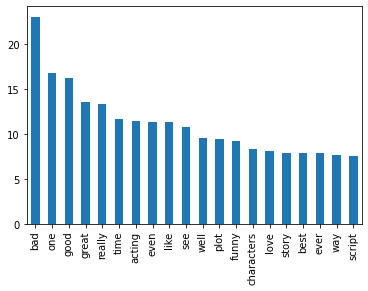

In [33]:
# visualize tfidf
X_tfid_df.sum().sort_values(ascending=False).head(20).plot(kind='bar')

In [34]:
# saving cleaned data set to csv
X_tfid_df.to_csv('D213Task2clean.csv')

### Word Clouds

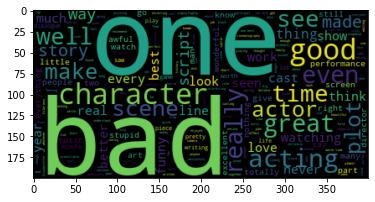

In [35]:
# Create a word cloud of all reviews:
wordcloud = WordCloud().generate(' '.join(imdb['tokenized'].apply(lambda x: ' '.join(x))))

# Display the word cloud:
plt.imshow(wordcloud, interpolation='bilinear')

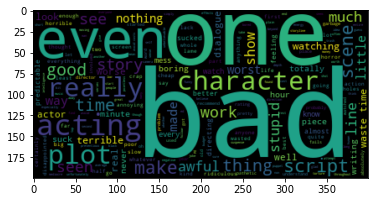

In [36]:
#wordcloud for negative reviews/ sentiment 0
wordcloud = WordCloud().generate(' '.join(imdb[imdb['Sentiment']==0]['tokenized'].apply(lambda x: ' '.join(x))))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')

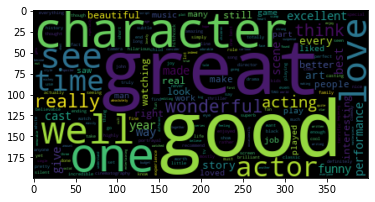

In [37]:
#wordcloud for positive reviews/ sentiment 1
wordcloud = WordCloud().generate(' '.join(imdb[imdb['Sentiment']==1]['tokenized'].apply(lambda x: ' '.join(x))))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')

### Splitting Data Into Train and Test Sets

In [38]:
# splitting reduced review into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(imdb['reduced'], imdb['Sentiment'], test_size=0.2, random_state=89)
# export train and test data to csv
X_train.to_csv('D213Task2X_train.csv', index=False)
X_test.to_csv('D213Task2X_test.csv', index=False)
y_train.to_csv('D213Task2y_train.csv', index=False)
y_test.to_csv('D213Task2y_test.csv', index=False)

In [39]:
print(f"The shape of the training sets are {X_train.shape} for X and {y_train.shape} for y.")
print(f"The shape of the testing sets are {X_test.shape} for X and {y_test.shape} for y.")

The shape of the training sets are (797,) for X and (797,) for y.
The shape of the testing sets are (200,) for X and (200,) for y.


In [40]:
# viewing x_train
X_train.head()

993                          looked like wonderful story
667                                                 good
267    one best mexican ever one less understood even...
483    seen many starring jaclyn smith god one best t...
695                                   highly recommended
Name: reduced, dtype: object

In [41]:
# Calculating vocabulary size
len(tfidfvector.get_feature_names_out())

2875

In [42]:
# Calculating word count statistics


#find max word count of reviews
max_length = imdb['word_count'].max()
# median word count of reviews
median_length = imdb['word_count'].median()
# mean word count of reviews
mean_length = imdb['word_count'].mean()
# std dev of word count of reviews
std_length = imdb['word_count'].std()

print("The maximum word count of reviews and the maximum sequence length is", max_length)
print("The median word count of reviews is", median_length)
print("The mean word count of reviews is", mean_length)
print("The standard deviation of the word count of reviews is", std_length)

The maximum word count of reviews and the maximum sequence length is 43
The median word count of reviews is 6.0
The mean word count of reviews is 6.993981945837513
The standard deviation of the word count of reviews is 5.209078795648238


In [43]:
# calculating proposed word embedding length
print("The proposed word embedding length is", round((max_length - std_length)))

The proposed word embedding length is 38


In [44]:
# parameter settings
vocab_size = len(tfidfvector.get_feature_names_out())
embedding_dim = 16 # 16 dimensions
max_length =  round((max_length - std_length)) # keep 38 words or truncate, this will hold the 3 standard deviations of data, or 99.7% of the data
trunc_method = 'post' # truncate after the word
padding_method = 'post' # pad after the word
oov_tok = "<OOV>" # out of vocabulary token

## B2. Tokenization Process

####The goal of tokenization is to take large clusters of words and split them into individual words, or tokens. These tokens are then compiled into a list containing all tokens in the original word cluster. This allows the machine learning algorithms in the recurrent neural network to recognize the words and identify patterns and relationships related to the words, in this case identifying if the word is used to convey positive sentiment or negative sentiment. 

Specifically, word tokenization was used in this analysis. Word tokenization is especially useful for text processing since it automatically creates boundaries after it detects a space between words. This allows the algorithm to discern an entire word as a single token instead of a single letter, as is the case with character tokenization (Khanna, 2021).

Each IMDB review was originally a long string as the corresponding value for a "review-text". Each review must be broken down to word level using word tokenization to perform sentiment analysis so the value of each individual concept ("bad", "good", "boring", “exciting”, etc.) can be weighted accordingly against whether or not a viewer enjoyed the movie. 
I used Python’s built in string() and regex packages to split the original reviews into tokenized strings. I  created a separate column for the tokenized reviews, named “tokenized”. Because I chose to use Python’s packages instead of a package built specifically to tokenize word groups, I had to manually write code to convert the text to lowercase, remove numbers, remove special characters, and remove stopwords from the data. All code to normalize the text can be viewed in this Jupyter Notebook. 

After this, I split the reviews into tokenized word listings. This reduced the reviews from complete sentences to a list of words. For example, “this is a sentence” was converted to a list containing, “this” “is” “a” “sentence”. Next, I created a column containing the tokenized word count of each review. Calling the row with the highest count in this column was used to determine the maximum sentence length for the model.

I then reordered the database columns, so the reviewer sentiment was last. The newly reordered columns consisted of “Review”, which contained the original, unaltered reviews, “reduced”, which contained the original review data with the stopwords removed, “tokenized” which contained the lists of tokenized words from the reduced reviews, “word_count” which contained the sum of tokenized words for that specific row, and “Sentiment” which contained either a zero or a one to represent if the reviewer felt positively or negatively about the movie. 

While the text was officially normalized and separated into tokens, it still needed to be converted into numerical data suitable for TensorFlow. TensorFlow’s “Tokenizer” function was fit to the training dataset. Following this, TensorFlow’s  fit_on_index() function was used to generate a word index, which assigned each word in the training set's vocabulary to an integer. The tokenizer.texts_to_sequences function converted each word to the previously assigned integer. The Tokenizer, fit_on_index, and texts_to_sequence functions were then used on test data. 

In [45]:
# start tensorflow tokenizer
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
# instantiage test train sentences
trainsent = []
trainlab = []
testsent = []
testlab = []

In [46]:
# add sentences to train and test
for i in range(len(X_train)):
    trainsent.append(X_train.iloc[i])
    trainlab.append(y_train.iloc[i])
for i in range(len(X_test)):
    testsent.append(X_test.iloc[i])
    testlab.append(y_test.iloc[i])

In [47]:
# preview train sentences
trainsent[:5]

['looked like wonderful story',
 'good',
 'one best mexican ever one less understood even mexican matter identified felt',
 'seen many starring jaclyn smith god one best though came years ago',
 'highly recommended']

In [48]:
# fit tokenizer on train sentences
tokenizer.fit_on_texts(trainsent)
#index of words
word_index = tokenizer.word_index

In [49]:
# preview word index
list(word_index.items())[:5]

[('<OOV>', 1), ('one', 2), ('bad', 3), ('good', 4), ('like', 5)]

In [50]:
# size of word index 
# decrease in words from 2877 expected due to OOV token
len(word_index)

2455

In [51]:
# convert train sentences to numerical sequences
train_sequences = tokenizer.texts_to_sequences(trainsent)
# pad train sequences
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_method, truncating=trunc_method)

## B3. Padding

####Once all the data is split into training and test sets, it can then be padded out to the shape the model is expecting. For this analysis, each review is padded out to 43 words, because that was the length of the longest review after the stopwords were removed and the reviews were tokenized. 

If padding is needed, it will occur at the end of the review. This way, none of the reviews are truncated in the padding process and the model will be able to train on as much data as possible.

A padded sentence preview can be viewed below.

In [52]:
# preview padded train sequences
train_padded[:1]

array([[461,   5,  34,  15,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

In [53]:
# padded sentence preview
print(trainsent[7])

wow bad


In [54]:
# convert test sentences to numerical sequences
test_sequences = tokenizer.texts_to_sequences(testsent)
# pad test sequences
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_method, truncating=trunc_method)

In [55]:
# preview padded test sequences
test_padded[:1]

array([[ 75,   1,  14,   1, 890,  17,   1,   1,  32, 786,  29,   1,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

In [56]:
# set pythonhashseed
os.environ['PYTHONHASHSEED']=str(42)
# set numpy seed
np.random.seed(42)
# set tensorflow random seed
tf.random.set_seed(89)

## B4. Categories

####Two categories of sentiment will be used since the reviews are being categorized as either positive or negative. Since the sentiment only has two categories, it is considered binary.

‘Sigmoid’ will be used as an activation function in the last layer of the model. Sigmoid is a common activation function for classification problems since it supports binary results.  

## B5. Data Preparation Steps

####After reading in the IMDB data, I viewed the dataframe’s first five entries and returned the dataframe shape. The data contained 1000 rows and 2 columns. Next,  I performed data cleaning by checking for null values and duplicate rows. The IMDB data contained no null values but did contain three duplicate rows. The three duplicate rows were dropped, reducing the dataframe size to 997 rows, or 997 individual reviews. 

Next, I printed a list of common stopwords and punctuation from nltk’s stopwords dictionary that would be removed from the dataset. Stopwords are commonly used words that do not provide context, such as “the”, “and”, “is”, etc.  A total of 211 elements were listed. I then created a list of seven movie related stopwords that would be removed from the dataset. This was done so the neural network did not accidentally attribute sentiment to a word describing a movie such as “film, or “flick”.  These stopwords were added to the list of existing stopwords, increasing it to 218 elements. I also created a tokenizer “OOV” token that would be used to replace any unknown words in the dataset. 

With the stopwords created, I performed stepwise tokenization to normalize all words in the dataset. First, all text was converted to lowercase, then all numbers were removed, followed by all special characters. Finally, all stopwords and punctuation elements listed previously were removed from the data. During this process, I added another column to the dataset named “reduced”. This contained the reviews with the stopwords removed.  I also added the “tokenized” column, which contained the list of individual tokens contained in the review. The newly added “word_count” column contained the total number of tokenized words in the review. 

With the words normalized, I created vectors for each tokenized review containing the frequency of words using Term frequency-inverse document frequency or TFID. TFID was chosen for vectorization because it weighs the importance of certain words depending on how frequently it appears in the dataset. Term frequency-inverse document frequency occurs in two parts. The first part, term frequency, measure how often the word appears in the data and divides this number by the total number of words in the dataset. The second part, inverse document frequency, calculates the importance of the word in the dataset. It is the logarithmic ratio of the number of total IMDB reviews to number of IMDB reviews which contain a particular word (Goyal, 2021). Visualizing the TFID revealed the words “bad”, “but”, and “not” were the highest weighted. 

Next, I visualized the word frequency with word clouds. The words “bad”, “one”, and “character” appeared most frequently overall. A word cloud of the negative reviews or reviews with a sentiment of 0 revealed the words “bad”, “one” and “even” occurred most frequently in negative reviews..  A word cloud of the positive reviews or reviews with a sentiment of 1, showed the words “great”, “good”, and “character” occurred most frequently in positive reviews.

The data was then split into train and test sets. The training dataset was 80% of the total data while the test dataset contained the remaining 20%. Training datasets as low as 70% and as high as 90% are acceptable in data analysis, with the most common distribution being 80% of the data allocated to training and the remaining 20% allocated to test data.

With the train and test set created, I ran calculations to determine the word count statistics. The maximum word count, median word count, mean word count, and the standard deviation of the word count were all calculated. The standard deviation of the word count and the maximum word count were then used to calculate the proposed embedding length of 38. 

I then set the vocabulary size to 2877, embedding dimensions to 16, maximum length to 38, set the truncate to post, set the padding method to post, and instantiated the OOV token. With the parameters set, I started the TensorFlow tokenizer and fit it on the training and test data, as explained in part B2. Of this report. After the training and test data were tokenized, I padded the data, so each entry was a uniform length. 

All data preparation code and output can be viewed in this document.

## B6. Copy of Data Set

####Please see the "D213Task2clean.csv" file a copy of the prepared dataset

## C1. Output of the Model Summary from TensorFlow:

In [57]:
# instantiate model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')])
# set standard loss function for binary classification
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [58]:
# print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 38, 16)            46000     
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 6)                 102       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 46109 (180.11 KB)
Trainable params: 46109 (180.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## C2 Layers and Parameters

####The model is a sequential model, consisting of 4 layers. The model function in a similar way to a funnel, starting out very wide with the first layer and gradually narrowing down until the final layer ends with a single node.

The first layer of the model is an Embedding layer. The embedding layer using real values instead of 0's and 1's to represent words in a more efficient manner in a way that is similar to One Hot Encoding. It is the largest layer of the model with 46,032 parameters. This comes from the total vocabulary of the reduced dataset (2,877) multiplied by the length of the vector for each word (16).

The second layer of the model is a GlobalAveragePooling1D layer. It serves to flatten the model, pooling the inputs from multiple dimensions into a single “1D” dimension. There are no parameters in this layer, as it does not weigh any inputs or outputs. Its sole purpose is to transform the data to make it easier to handle. Where the Embedding layer created a 2-dimensional output, this layer turns this into a single dimension of 46,032.

The third layer of the model is a Dense layer consisting of 6 neurons or nodes, using the ReLu activation function. This layer starts narrowing down the data from its wide shape towards something smaller, given that we're working towards a single binary output for the entire model. This layer reduces the output from 1 dimension of 46,032 elements down to just 6 elements, and it handles 102 parameters in doing so. 

The final layer is another Dense layer consisting of one neuron, using the sigmoid activation function. This layer represents that the final output of the model in a single value, which will either be 1 (positive sentiment towards the movie) or 0 (negative sentiment towards the movie). This layer has 7 parameters, which is the number of outputs (1) multiplied by our input from the prior Dense layer (6), plus an extra round of output.

## C3. Hyperparameters

####The ReLU (Rectified Linear Unit) activation function was used in the first dense layer, or third overall layer. ReLU is considered the default activation function according to Sucky, 2021, due to its high performance. The only reason to use a different activation function is if it is required by the parameters.

The Sigmoid activation function was needed for the final layer because the result was binary. The Sigmoid activation function is ideal for classification analysis since the minimum and maximum outcomes for a sigmoid functions S-curve are zero and one. 

The number of nodes per layer was described in more detail above in part C2 of this report.  The embedding layer had 16 nodes, as this is the size of the layer's output. The GlobalAverage1D() layer would not be considered a node, but rather a pass-through entity, making the data easier to handle for the other layers. The two hidden dense layers that follow have 6 nodes and 1 node. I chose 6 nodes for the first dense layer since it is close to the square root of the maximum review length of 43. 1 node was chosen for the second dense layer since the results are binary. 

Binary cross entropy was chosen as the loss function for this model. Binary cross entropy is suitable for a classification problem because the model is solving for a binary problem of 0 or 1 (negative sentiment vs positive sentiment). The result can only be completely correct or incorrect. Compare this to a regression problem that involves projecting numerous values that can be varying percentages correct or incorrect. Mean squared error could work for model like that, but it is not suitable for completely correct or incorrect answers. 

The model's chosen optimizer was "Adam". Similar to ReLU, Adam is considered the industry standard due to it's good performance and high levels of efficiency (Sucky, 2021). 

Validation Accuracy with a patience of 2 was chosen as the stopping critera for this model. This means the model will stop running if validation accuracy returns lower than the subsequent epoch's validation accuracy score twice in a row. If the model's accuracy on the test data subsequently lowers, that indicates there is a problem with the parameters. I would rather the model stop abrubtly, allowing me to adjust the parameters quickly than run through the remaining epochs while the accuracy continues to decline. 

The evaluation metric for this model is accuracy on the training data. the model was fit to the the training data and as a result, it should become more accurate as more epochs are run. The more accurate the model is on the training data, the more likely it will also be accurate on the test data. 

In [59]:
# instantiate label arrays
train_labels = np.array(trainlab)
test_labels = np.array(testlab)

In [60]:
# Early stopping
callbacks = EarlyStopping(monitor= 'val_accuracy', patience=2)

In [61]:
#train model
num_epochs = 7
results = model.fit(train_padded, train_labels, 
                    epochs=num_epochs, 
                    validation_data=(test_padded, test_labels), 
                    callbacks = EarlyStopping(monitor='val_accuracy', patience=2))    

Epoch 1/7
25/25 [==============================] - 1s 9ms/step - loss: 0.6936 - accuracy: 0.4944 - val_loss: 0.6924 - val_accuracy: 0.5150
Epoch 2/7
25/25 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.6110 - val_loss: 0.6919 - val_accuracy: 0.5200
Epoch 3/7
25/25 [==============================] - 0s 3ms/step - loss: 0.6911 - accuracy: 0.5031 - val_loss: 0.6912 - val_accuracy: 0.5350
Epoch 4/7
25/25 [==============================] - 0s 3ms/step - loss: 0.6886 - accuracy: 0.7541 - val_loss: 0.6897 - val_accuracy: 0.6300
Epoch 5/7
25/25 [==============================] - 0s 3ms/step - loss: 0.6844 - accuracy: 0.7089 - val_loss: 0.6875 - val_accuracy: 0.8250
Epoch 6/7
25/25 [==============================] - 0s 3ms/step - loss: 0.6796 - accuracy: 0.8783 - val_loss: 0.6848 - val_accuracy: 0.6950
Epoch 7/7
25/25 [==============================] - 0s 4ms/step - loss: 0.6731 - accuracy: 0.9046 - val_loss: 0.6808 - val_accuracy: 0.8500


## D1. Impact of the Stopping Criteria

####In the training model above, the model trained all 7 epochs. The early stop was not needed for this model. The validation accuracy steadily improved with each Epoch, until Epoch 6/7. The validation accuracy decreased from 0.8 to 0.6 on Epoch 6. Since the patience was set to 2, the model would stop running if the validation accuracy was lower than 0.6 on Epoch 7 if more than 7 Epochs were being run on the model. The validation accuracy normalized itself to 0.8 on Epoch 7/7.

In [62]:
 #print accuracy and loss
print("Accuracy: ", results.history['accuracy'][-1])
print("Loss: ", results.history['loss'][-1])

Accuracy:  0.9046424031257629
Loss:  0.6730566620826721


## D2. Model Fitness

In [68]:
# Evaluate model by executing it on the test data
model.evaluate(test_padded, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.6808 - accuracy: 0.8500


[0.6807883977890015, 0.8500000238418579]

####The accuracy score of 85% indicates the model does a good job fitting the IMDB data. The high percentage of loss at 68% has two possible explanations: the first being due to the model solving a classification problem, where it either completely correct or completely incorrect. This can cause the percentage of loss to seem inflated compared to looking at the RMSE of regression problem, where the answer can be “slightly wrong” or off by a percentage point or two. The second explanation is the model is not confident in it's predictions. This is likely caused by the small size of the IMDB dataset.

I limited the Epochs to 7 to prevent overfitting. The appropriate number of Epochs for a dataset this size was anywhere from 5 Epochs to 20 Epochs. Each time an Epoch runs, the model fit to the data increases as the model accuracy (ideally) increases. Running too many Epochs would cause the data to overfit. 
 
Using validation accuracy as a stopping criteria also prevents overfitting by stopping the model from running if the validation accuracy lowers through two Epochs in a row. In an overfitting model, the training data may become more accurate while the validation accuracy decreases, or the loss increases.

## D3. Training Visualizations

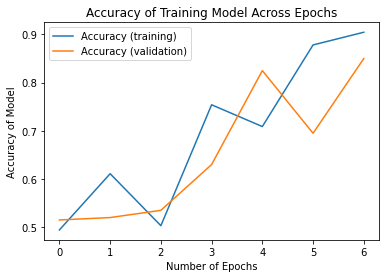

In [63]:
plt.plot(results.history['accuracy'], label= "Accuracy (training)")
plt.plot(results.history['val_accuracy'], label= "Accuracy (validation)")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy of Model")
plt.legend()
plt.title("Accuracy of Training Model Across Epochs")
plt.show()

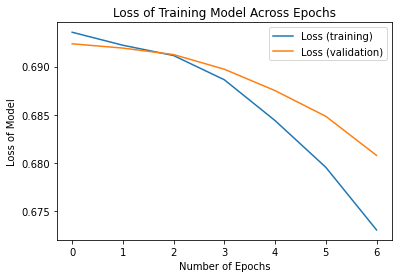

In [64]:
plt.plot(results.history['loss'], label= "Loss (training)")
plt.plot(results.history['val_loss'], label= "Loss (validation)")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss of Model")
plt.legend()
plt.title("Loss of Training Model Across Epochs")
plt.show()

## D4. Predictive Accuracy of Trained Network

####As seen in part D2 of this report, the model correctly predicted the sentiment of a customer review in the test data 85% of the time.

The plots above in Part D3 show an upward trend in the prediction accuracy of the model with each Epoch iteration for both the training and validation data. There were dips in training accuracy on Epoch 2/7 and Epoch 4/7, but the model corrected itself and became more accurate. Similarly, there was a dip in validation accuracy on Epoch 5/7 that also corrected itself. We can also see the loss of the training and validation data decreases with each subsequent Epoch. This is a very positive sign that shows the model is not only becoming more accurate as it runs through each Epoch, it is also making fewer mistakes.

The loss of the model is high at 68%. As explained in part D2 of this report this can be caused by the nature of classification problem's outputs being either completely correct or completely incorrect. Another possible explanation is the model lacks confidence in it's decision due to the small size of the dataset. 

## E. Code To Save Model

In [ ]:
# Save model to be able to be recalled later
model_file_name = "D213Task2Model"
model.save(model_file_name)
print(f"Model successfully saved as {model_file_name}")

## F. Functionality of Neural Network

####My hypothesis was proven true. Viewer sentiment of movies can be predicted with an accuracy of 70% or greater using a recurrent neural network model trained on the IMDB reviewer sentiment dataset. The neural network created can perform sentiment analysis at an accuracy rate of 85%. The high loss rate of 68% indicate the model is not sure in it's predictions. There is certainly room for improvement, but this is a solid start. 

The model's network architecture is basic, consisting of an embedding layer, flattening layer, and two hidden dense layers. While this is not as involved as using LSTM layers within the model, it sufficiently predicted the audience sentiment of movies. 

I was considering adding another dense layer in order to slow down the rate the model was funneling the input from 43 word reviews down to one datapoint. My concern proved to be unfounded, as the model exceeded the minimum 70% accuracy benchmark. I did try to add another hidden dense layer to my model, but the accuracy did not improve. If anything, TensorFlow's random initiation of weight and seed setting decreased the accuracy of the expanded model. I reduced the model back to my initial 4 layers including 2 hidden dense layers for my final report. 

## G. Recommendations

####With an 85% accuracy rate, I recommend Telco Communications use this model to determine which movie rights to purchase for their streaming service based on the predicted audience sentiment of the movies. If Telco Communication wishes to validate the accuracy of this model, I would recommend using another movie review dataset as the test data.  

## H. Reporting

####This jupyter notebook with report has been submitted as both a PDF document and Jupyter Notebook file. All code and explanations can be found herein.

## Code Sources

####IMDB data set:
https://archive.ics.uci.edu/dataset/331/sentiment+labelled+sentences
TensorFlow tutorial:
https://www.tensorflow.org/tutorials/keras/text_classification
How to generate word clouds in Python:
https://www.geeksforgeeks.org/generating-word-cloud-python/
Step by Step guide to Sentiment Analysis:
https://towardsdatascience.com/a-complete-step-by-step-tutorial-on-sentiment-analysis-in-keras-and-tensorflow-ea420cc8913f

## Academic Sources

####Goyal, C. (2021, June 22). Step By Step Guide to Master NLP - Word Embedding and Text Vectorization. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/06/part-5-step-by-step-guide-to-master-nlp-text-vectorization-approaches/ 

Khanna, C. (2021, August 12). Word, Subword, and Character-Based Tokenization: Know the Difference. Medium. https://towardsdatascience.com/word-subword-and-character-based-tokenization-know-the-difference-ea0976b64e17 

Sucky, R. N. (2021, July 8). A complete step by step tutorial on sentiment analysis in Keras and tensorflow. Medium. Retrieved October 23, 2022, from https://towardsdatascience.com/a-complete-step-by-step-tutorial-on-sentiment-analysis-in-keras-and-tensorflow-ea420cc8913f

Yasar, K. (2023, August 21). What Is A Neural Network? Definition, Types and How It Works. Enterprise AI. https://www.techtarget.com/searchenterpriseai/definition/neural-network 